In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Display plots inline
%matplotlib inline
# Load the dataset
file_path = '/Users/aadithyaram/Desktop/cropanalysis.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [57]:
data.shape

(246091, 7)

In [58]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [60]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [61]:
data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


/var/folders/df/cjrh6jqs3w90375f4bscv80r0000gn/T/ipykernel_62709/1672920765.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




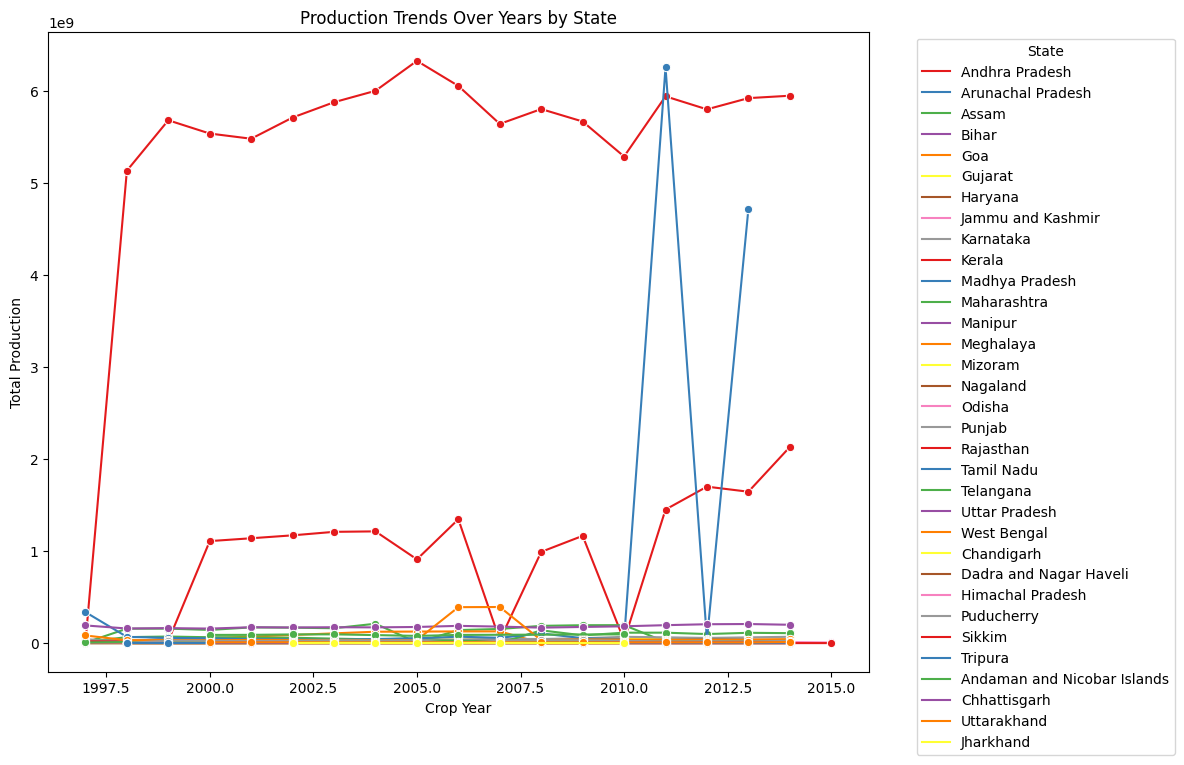

In [93]:
#Production Trend Over the Years By State
plt.figure(figsize=(12, 8))
production_trends_by_state = data.groupby(['Crop_Year', 'State_Name'])['Production'].sum().reset_index()
sns.lineplot(x='Crop_Year', y='Production', hue='State_Name', data=production_trends_by_state, marker='o', palette='Set1', ci=None)
plt.xlabel('Crop Year')
plt.ylabel('Total Production')
plt.title('Production Trends Over Years by State')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


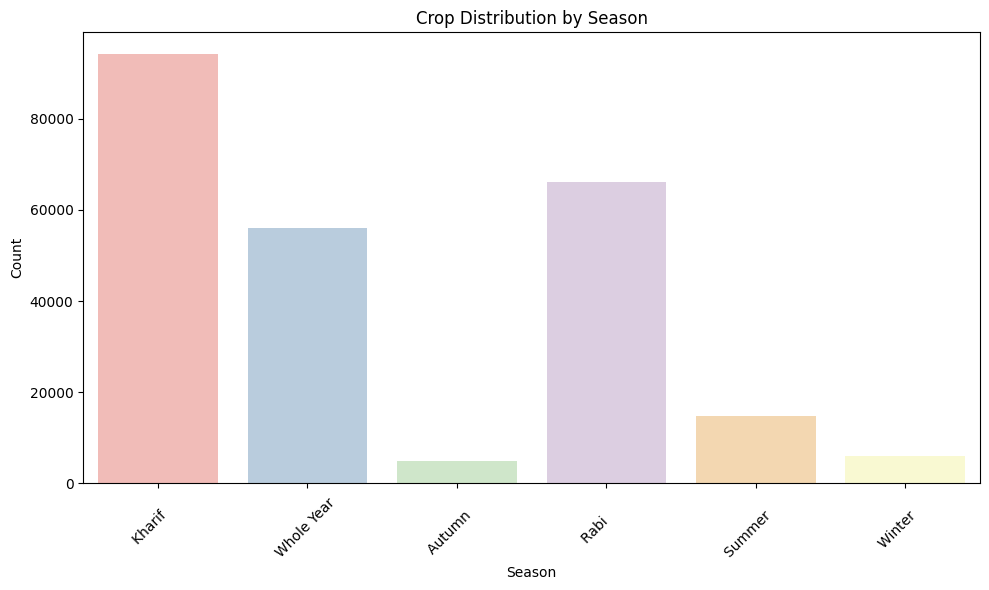

In [88]:
# Countplot of Crop distribution by Season
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', data=data, palette='Pastel1')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Crop Distribution by Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


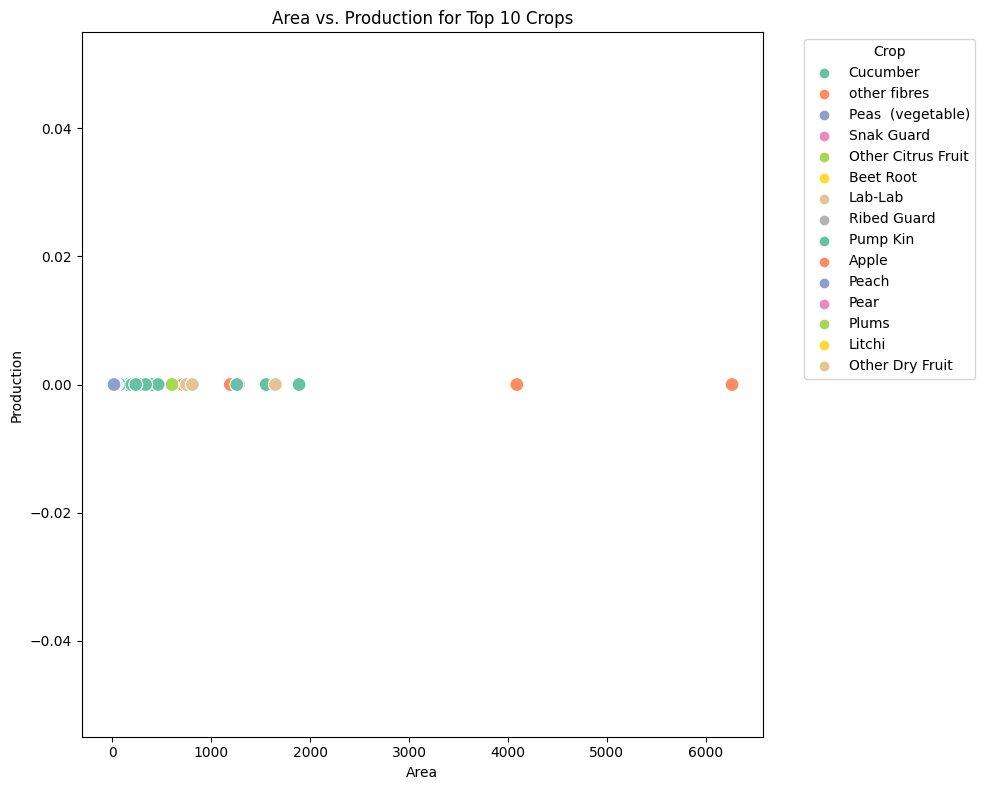

In [87]:
#Area vs. Production for top 10 crops
top_10_crops = crop_production.index
top_crop_data = data[data['Crop'].isin(top_10_crops)]
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Area', y='Production', hue='Crop', data=top_crop_data, palette='Set2', s=100)
plt.xlabel('Area')
plt.ylabel('Production')
plt.title('Area vs. Production for Top 10 Crops')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


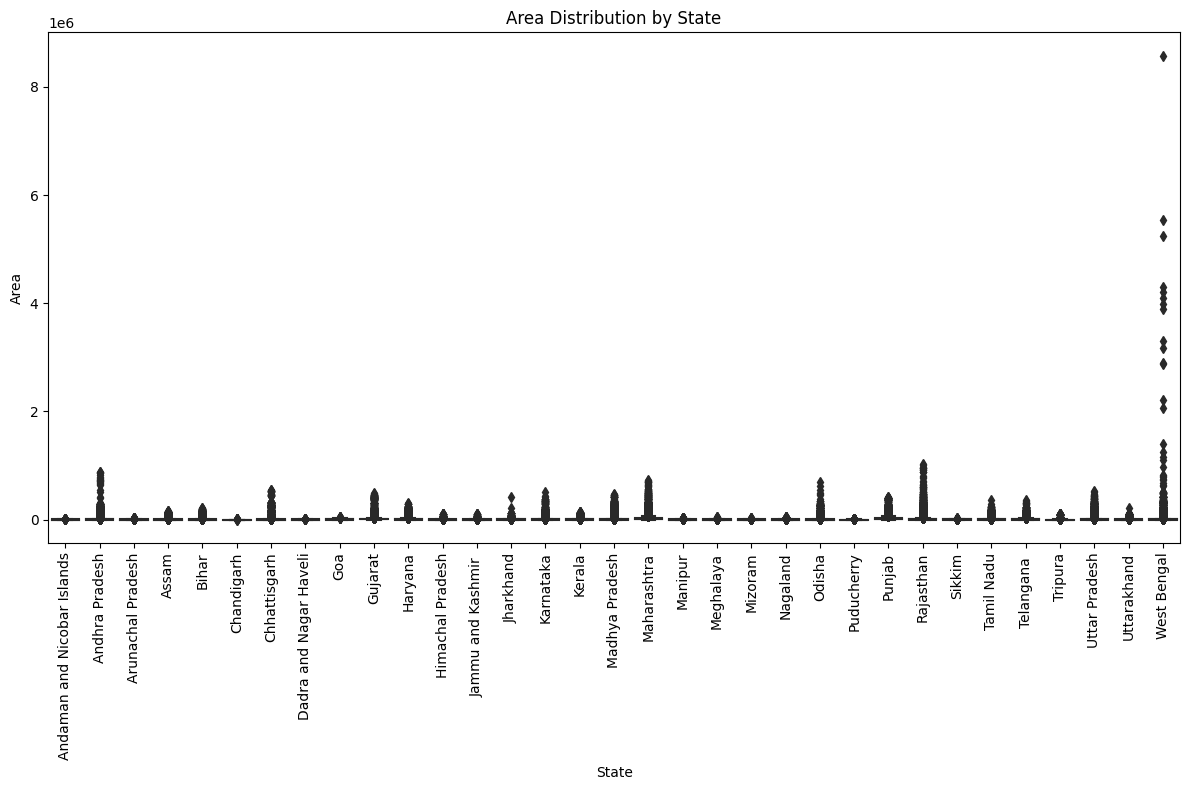

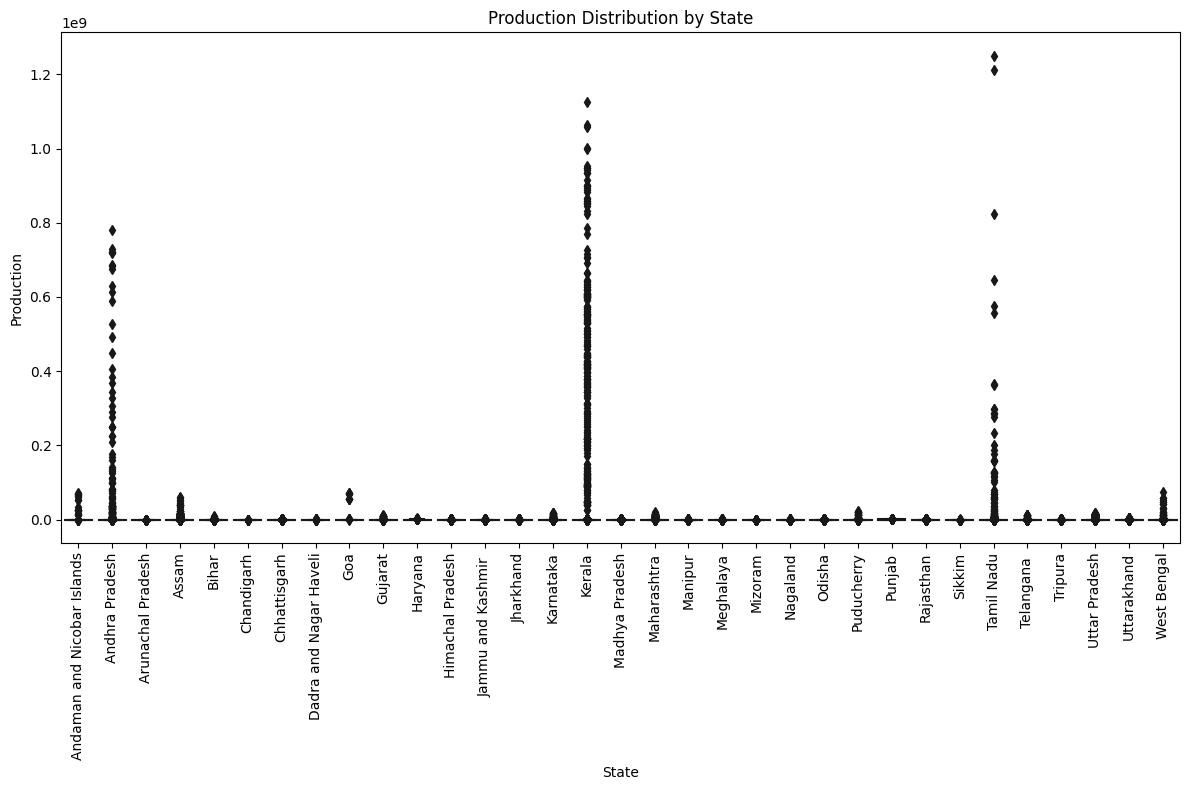

In [98]:
# Boxplot of Area and Production distribution by State
plt.figure(figsize=(12, 8))
sns.boxplot(x='State_Name', y='Area', data=data, palette='Purples')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Area')
plt.title('Area Distribution by State')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='State_Name', y='Production', data=data, palette='PuBuGn')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Production')
plt.title('Production Distribution by State')
plt.tight_layout()
plt.show()


Crop
Coconut         1.299816e+11
Sugarcane       5.535682e+09
Rice            1.605470e+09
Wheat           1.332826e+09
Potato          4.248263e+08
Cotton(lint)    2.970000e+08
Maize           2.733418e+08
Jute            1.815582e+08
Banana          1.461327e+08
Soyabean        1.418372e+08
Name: Production, dtype: float64


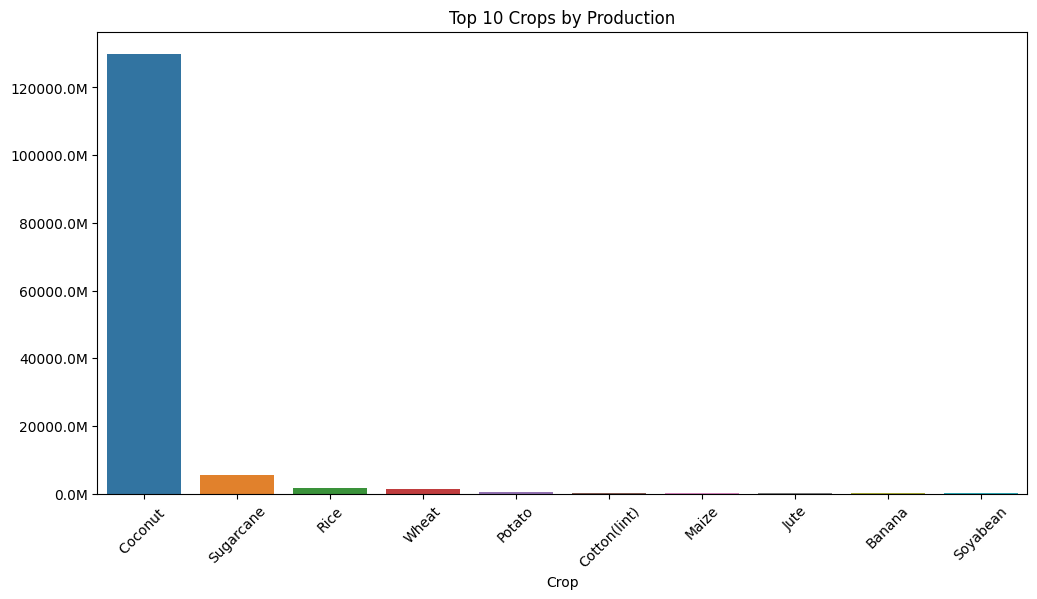

In [62]:
# Convenient Labelling
def format_millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

# Insight 1: Top crops by production
top_crops = data.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(10)
print(top_crops)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_crops.index, y=top_crops.values)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_millions))
ax.set_title('Top 10 Crops by Production')
plt.xticks(rotation=45)
plt.show()


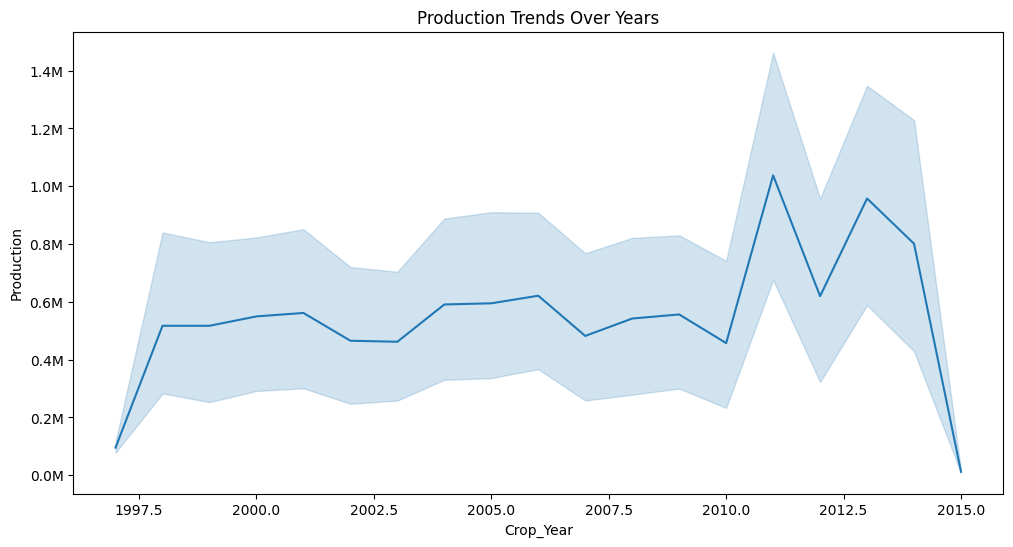

In [63]:
# Insight 2: Production trends over years
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=data, x='Crop_Year', y='Production')
ax.set_title('Production Trends Over Years')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_millions))
plt.show()


In [64]:
# Insight 3: Top states by production
top_states = data.groupby('State_Name')['Production'].sum().sort_values(ascending=False).head(10)
print(top_states)

State_Name
Kerala                         9.788005e+10
Andhra Pradesh                 1.732459e+10
Tamil Nadu                     1.207644e+10
Uttar Pradesh                  3.234493e+09
Assam                          2.111752e+09
West Bengal                    1.397904e+09
Maharashtra                    1.263641e+09
Karnataka                      8.634298e+08
Andaman and Nicobar Islands    7.182232e+08
Punjab                         5.863850e+08
Name: Production, dtype: float64


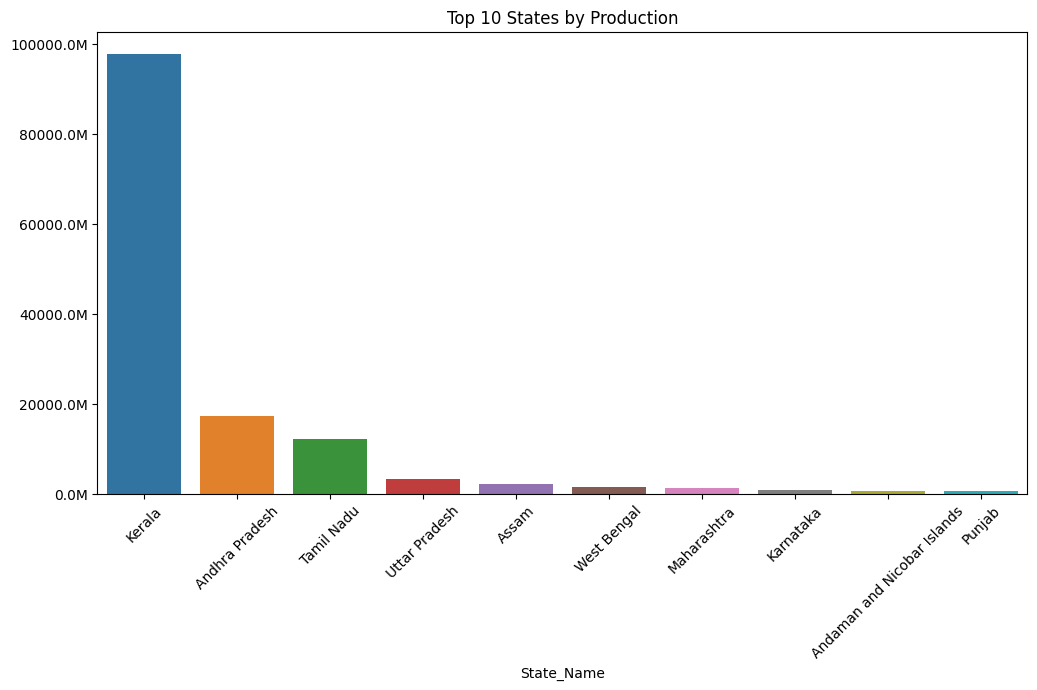

In [65]:
# Insight 4: Crop production comparison between high and low production states
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_states.index, y=top_states.values)
ax.set_title('Top 10 States by Production')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_millions))
plt.xticks(rotation=45)
plt.show()

In [74]:
# Drop rows with missing values
data = data.dropna(subset=['Production'])
missing_values = data.isnull().sum()
print(missing_values)

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64


In [75]:
X = data[['Crop_Year', 'Area']]
y = data['Production']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Model Eval
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 401500837552061.3
R-squared: 0.00208025972940562


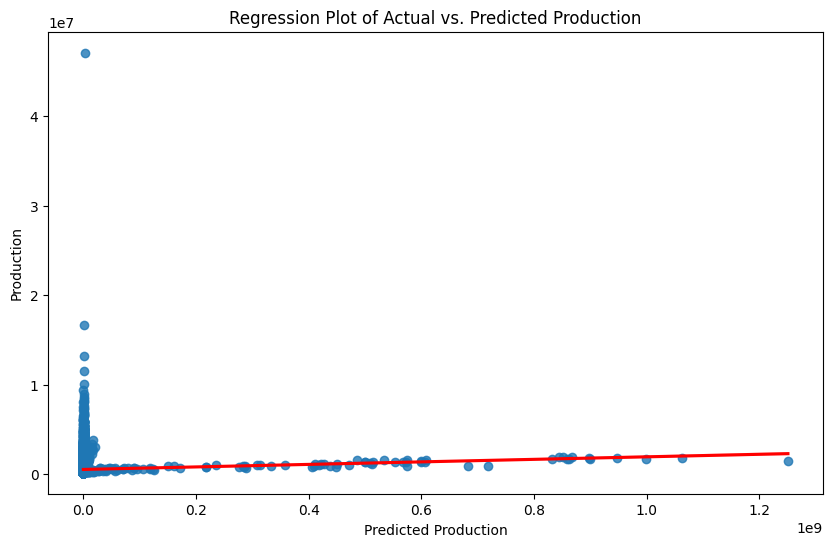

In [76]:
# Regression plot of Actual vs. Predicted Production
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel('Predicted Production')
plt.ylabel('Production')
plt.title('Regression Plot of Actual vs. Predicted Production')
plt.show()


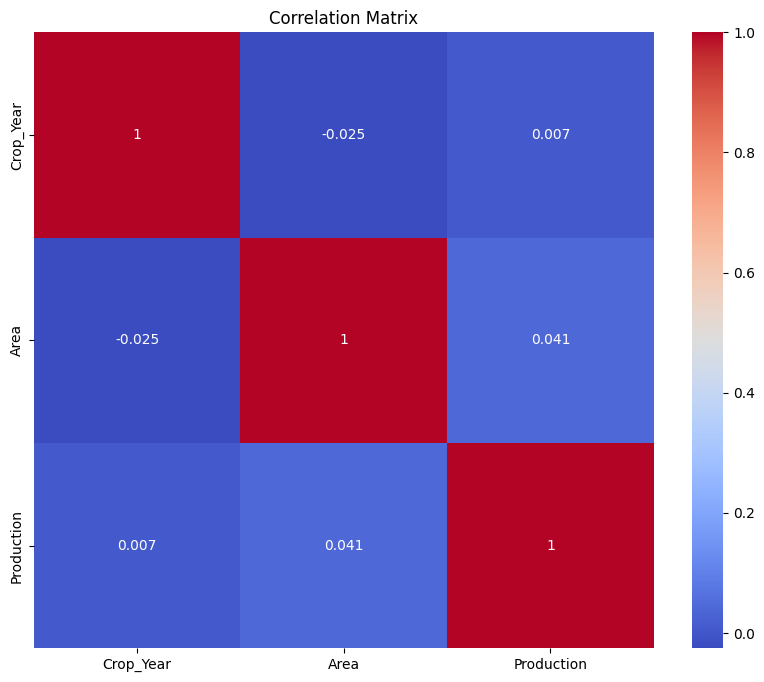

In [77]:
#Correlation Matrix of Crop Year, Area & Production
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


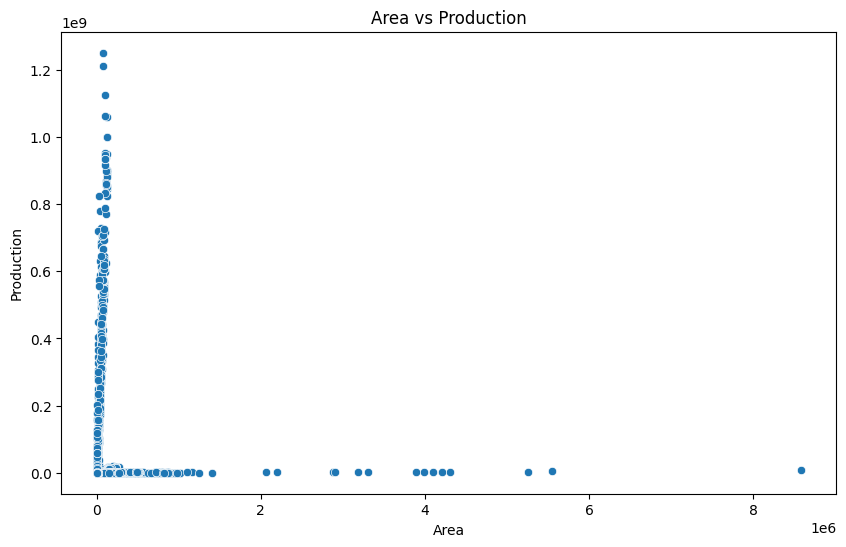

In [78]:
# Scatter plot of Area vs Production
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Area', y='Production')
plt.title('Area vs Production')
plt.show()

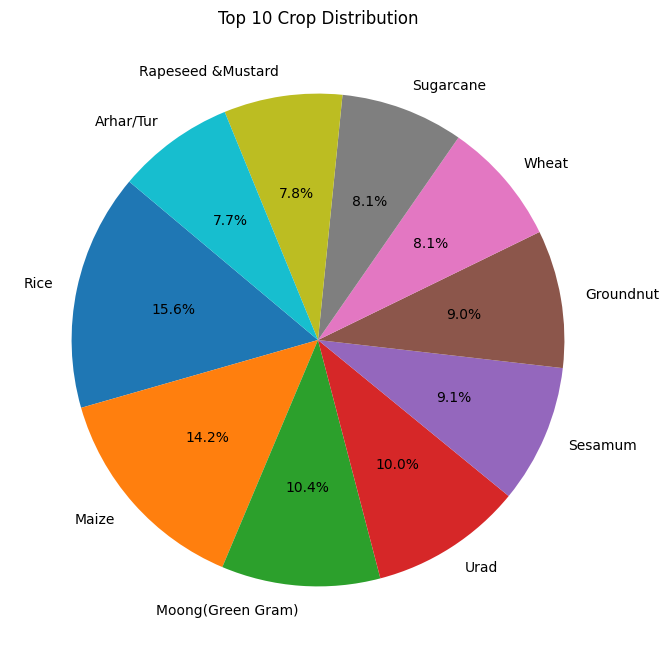

In [79]:
#Top 10 Crop Distribution
crop_distribution = data['Crop'].value_counts()
top_10_crop_distribution = crop_distribution.head(10)
plt.figure(figsize=(10, 8))
plt.pie(top_10_crop_distribution, labels=top_10_crop_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Crop Distribution')
plt.show()
